In [2]:
import Ska.engarchive.fetch as fetch
import Chandra.Time

import datetime as dt
import matplotlib.dates as mdate
from matplotlib import gridspec

import matplotlib.pyplot as plt

import numpy as np

from hrcsentinel import hrccore as hrc

from Scripts.msidlists import *
from Scripts.event_times import *
from Scripts.plot_stylers import *


# allow_subset=True should let us draw more data points
fetch.data_source.set('maude allow_subset=False')

hrc.styleplots()


%config InlineBackend.figure_format = 'retina'

This is the number you need to subtract from the second set of temperatures to overlay against the first set. It's the delta time between the start of both anomalies. 

In [14]:
delta_anomaly = time_of_second_anomaly - mdate.date2num(eventdate)
delta_anomaly

array([ 3.33848392])

MAUDE FETCH...DONE
MAUDE FETCH...DONE
Fetching full-resolution data for MSIDS=['AOSARES1']
  from 2020:230:21:45:42.113 to 2020:260:21:45:42.113


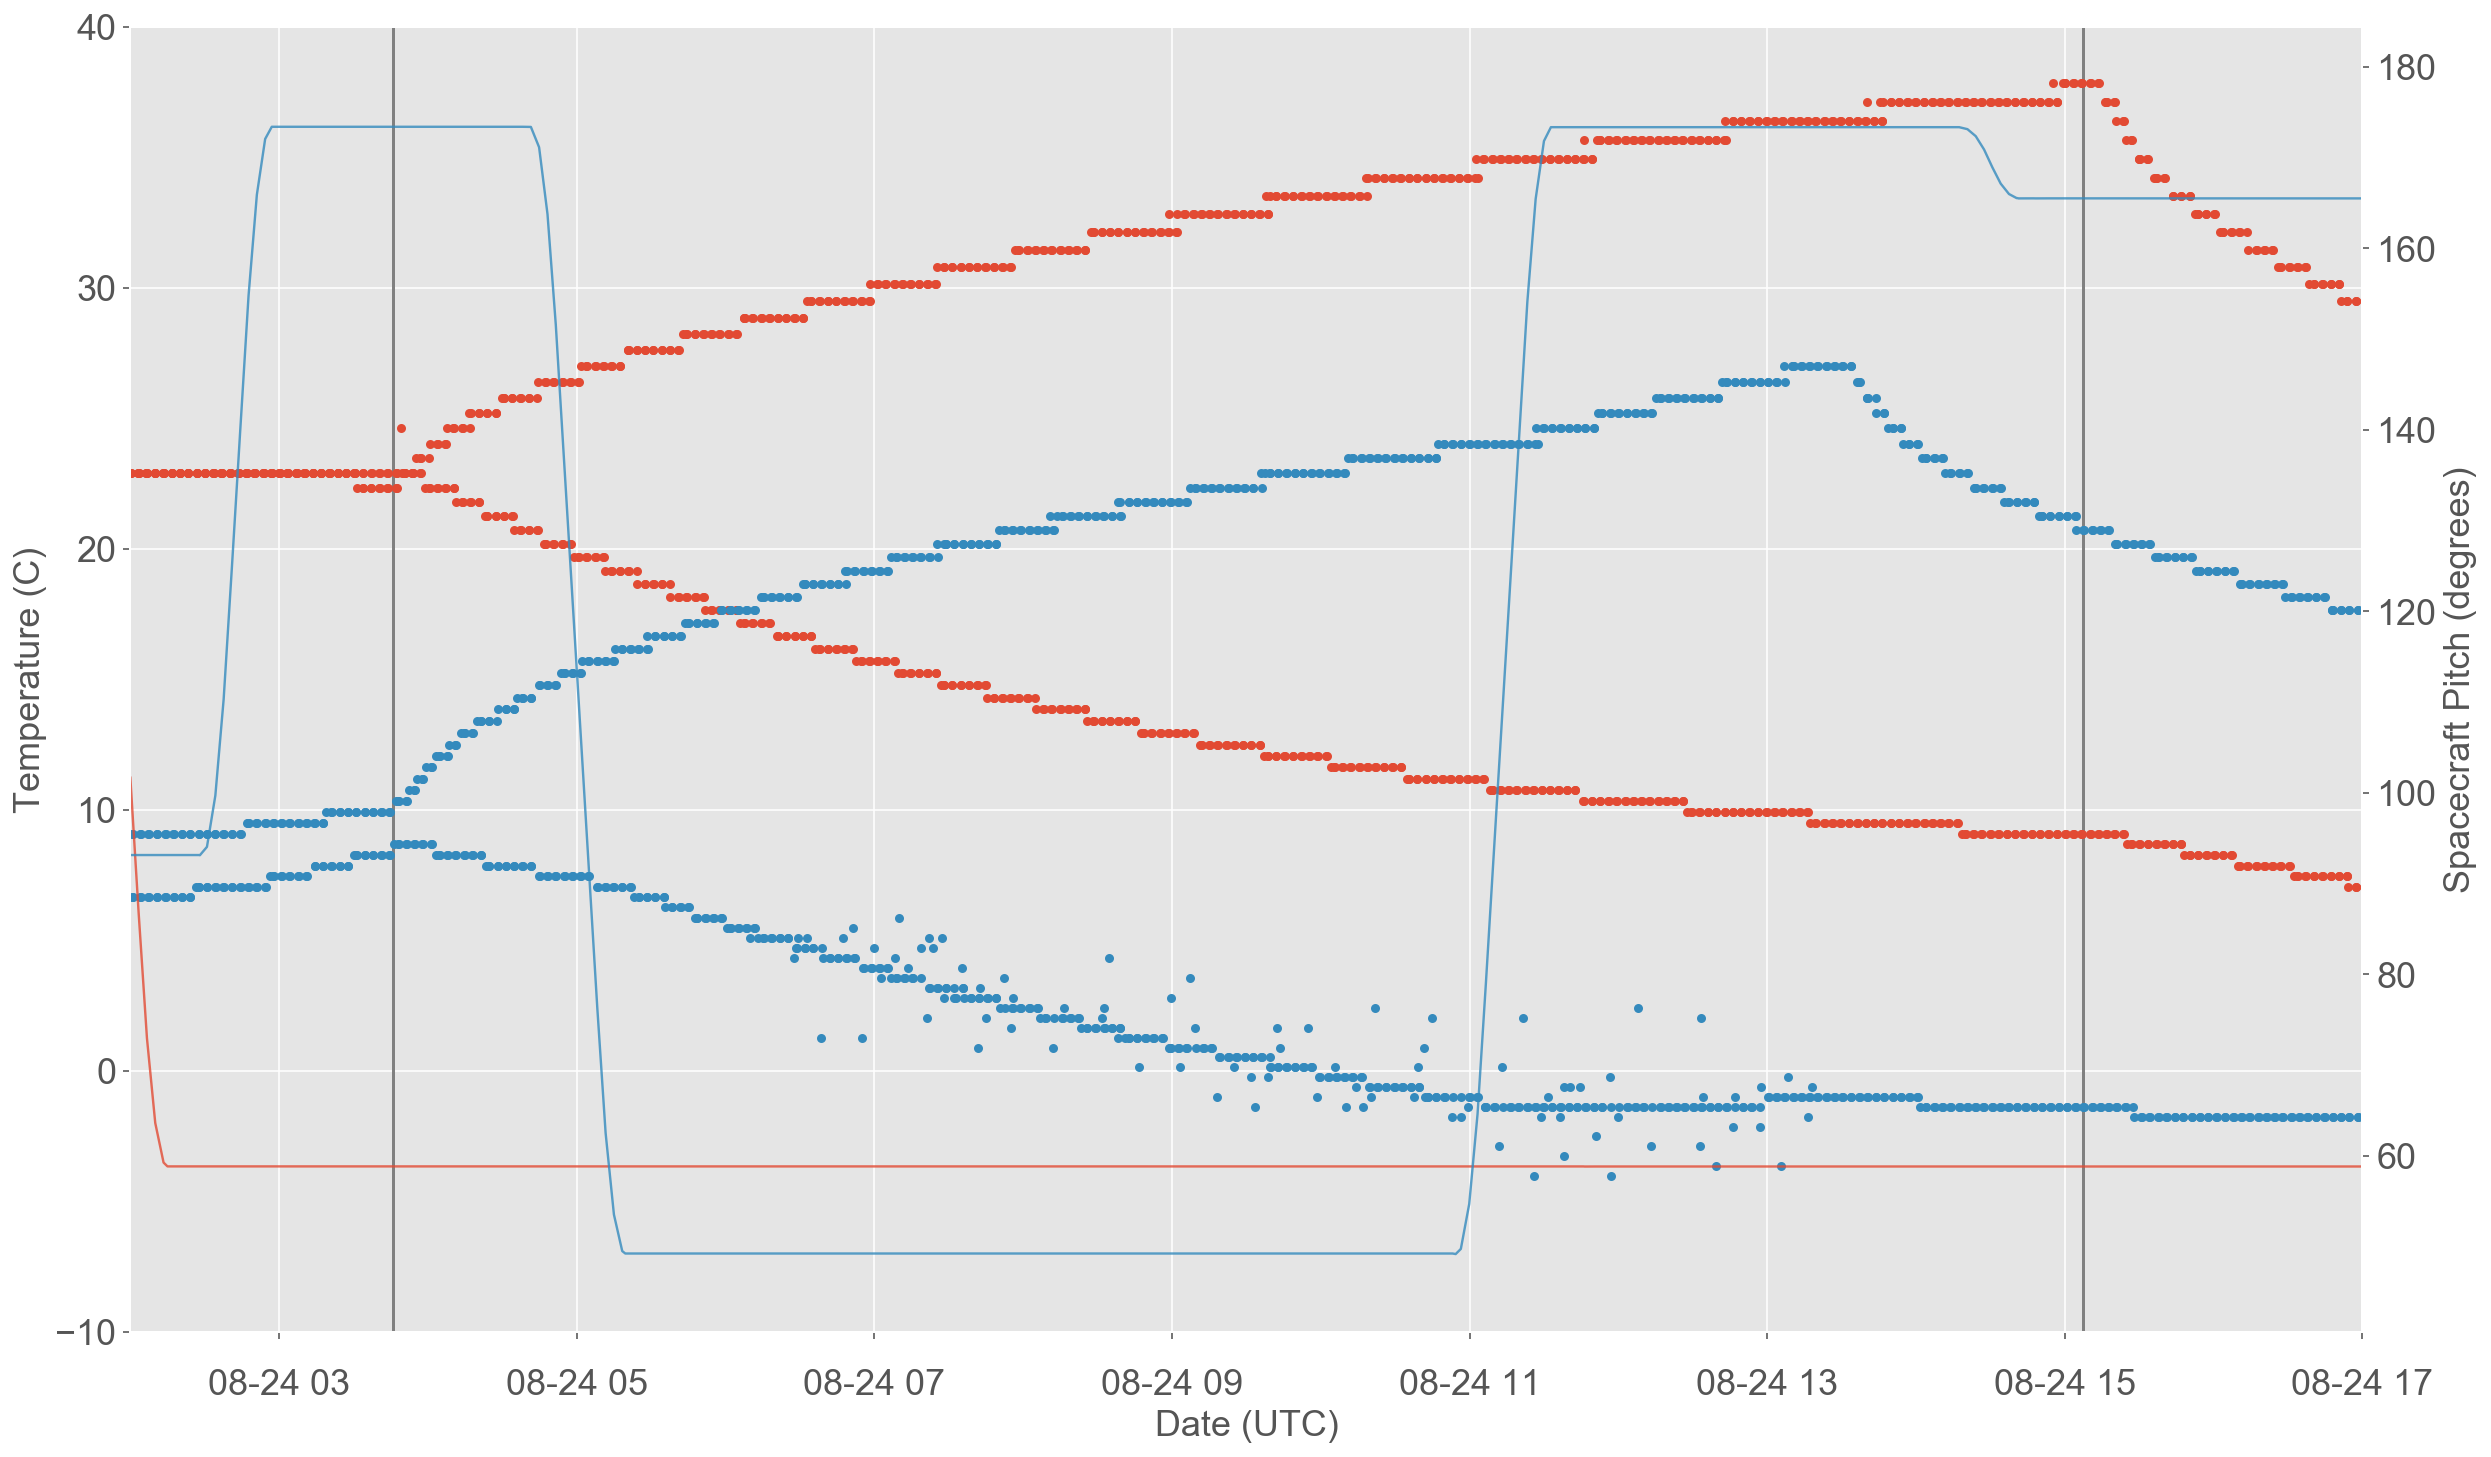

In [29]:

critical_anomaly_temps = [
    # "2FE00ATM",  # Front-end Temperature (c)
    # "2LVPLATM",  # LVPS Plate Temperature (c)
    # "2IMHVATM",  # Imaging Det HVPS Temperature (c)
    # "2IMINATM",  # Imaging Det Temperature (c)
    # "2SPHVATM",  # Spectroscopy Det HVPS Temperature (c)
    # "2SPINATM",  # Spectroscopy Det Temperature (c)
    # "2PMT1T",  # PMT 1 EED Temperature (c)
    # "2PMT2T",  # PMT 2 EED Temperature (c)
    # "2DCENTRT",  # Outdet2 EED Temperature (c)
    "2FHTRMZT",  # FEABox EED Temperature (c)
    "2CHTRPZT",  # CEABox EED Temperature (c)
#     "2FRADPYT",  # +Y EED Temperature (c)
#     "2CEAHVPT",  # -Y EED Temperature (c)
#     "2CONDMXT",  # Conduit Temperature (c)
#     "2UVLSPXT",  # Snout Temperature (c)
    # CEA Temperature 1 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
#     "2CE00ATM",
#     # CEA Temperature 2 (c) THESE HAVE FEWER POINTS AS THEY WERE RECENTLY ADDED BY TOM
#     "2CE01ATM",
#     "2FEPRATM",  # FEA PreAmp (c)
#     # Selected Motor Temperature (c) THIS IS ALWAYS 5 DEGREES THROUGHOUT ENTIRE MISSION
#     "2SMTRATM",
#     "2DTSTATT"   # OutDet1 Temperature (c)
]


fetch.data_source.set('maude')
fig, ax = plt.subplots(figsize=(20,12))

rasterized=True
markersize=3.5


# ax.axvline(sunday_pass, color='gray')
# ax.axvline(sunday_pass_end, color='gray', linestyle='dashed')
ax.axvline(eventdate, color='gray')
ax.axvline(hrc_poweroff_date, color='gray')
# ax.axvline(cap_step_2, color='gray')
# ax.axvline(thursday_early_pass, color='gray')
# ax.axvline(thursday_early_pass_end, color='gray', linestyle='dashed')

ax.axvline(time_of_second_anomaly, color='gray')
ax.axvline(time_of_second_shutdown, color='gray')

# ax.axvline(time_of_cap_1543, color='gray')

# ax.axhline(-20, color='gray')
# ax.axhline(-40, color=red)

n_lines = len(critical_anomaly_temps)
color_idx = np.linspace(0, 1, n_lines)


for i, msid in zip(color_idx, critical_anomaly_temps):
    print('MAUDE FETCH...', end="")
    msid = fetch.MSID(msid, start='2020:225')
    print('DONE')
    
    times = hrc.convert_chandra_time(msid.times)
    
    if msid.unit == 'K':
        vals = msid.vals - 273.15
    else:
        vals = msid.vals
    
    if msid.content == 'hrc5eng':
        ax.plot_date(times, vals, markersize=markersize, rasterized=rasterized, color=red, label=msid.MSID)
        ax.plot_date(times-delta_anomaly, vals, markersize=markersize, rasterized=rasterized, color=blue, label=msid.MSID)
        

        

ax2 = plt.twinx(ax)

dat = fetch.get_telem('AOSARES1')
ax2.plot_date(hrc.convert_chandra_time(dat['AOSARES1'].times), dat['AOSARES1'].vals, markersize=0, linestyle='-', linewidth=1.2, color=red, alpha=0.8)

ax2.plot_date(hrc.convert_chandra_time(dat['AOSARES1'].times)- delta_anomaly, dat['AOSARES1'].vals, markersize=0, linestyle='-', linewidth=1.2, color=blue, alpha=0.8)
ax2.set_ylabel('Spacecraft Pitch (degrees)')

ax2.grid('off')
# lgnd = ax.legend(loc=2, fancybox=True, framealpha=1)
# for i in range(len(lgnd.legendHandles)):
#     lgnd.legendHandles[i]._legmarker.set_markersize(20)

ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Date (UTC)')
ax.tick_params(axis='x', which='major', pad=15)
xmin = dt.datetime(2020, 8, 24, 2)
xmax = dt.datetime(2020, 8, 24, 17)
ax.set_xlim(xmin, xmax)

ax.set_ylim(-10, 40)


plt.show()

fig.savefig('../Figures/temperatures_across_both_anomalies.pdf', dpi=300)

In [12]:
delta_anomaly = time_of_second_anomaly - mdate.date2num(eventdate)
delta_anomaly

array([ 3.33848392])

In [10]:
eventdate

[datetime.datetime(2020, 8, 24, 3, 45, 54, 967615, tzinfo=<matplotlib.dates._UTC object at 0x7fa1a8bc1048>)]